In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy import stats

# Assignment Tasks

## 1. Initial Data Exploration & Basic Insights

In [85]:
df = pd.read_csv('listing_data_publish.csv')


In [86]:
df.head()

,listing_id,type,sub_type,start_date,end_date,listing_type,building_age,total_floor_count,floor_no,room_count,size,student_avaliable,mortgage_avaliable,address,furnished,heating_type,price,currency
0,1,Konut,Daire,1/3/19,1/3/19,satılık,3,4,Kot 3,3+1,130.0,NaN,NaN,Kocaeli/Körfez/Fatih,Eşyasız,Kalorifer (Doğalgaz),NaN,NaN
1,2,Konut,Daire,1/2/19,1/2/19,satılık,0,5,1,4+1,175.0,NaN,NaN,Ankara/Yenimahalle/Burç,Eşyasız,Kombi (Doğalgaz),209500.0,TRY
2,3,Konut,Daire,1/2/19,1/2/19,satılık,0,3,1,3+1,125.0,NaN,NaN,Antalya/Kepez/Kütükçü,Eşyasız,Klima,210000.0,TRY
3,4,Konut,Daire,1/2/19,1/2/19,satılık,0,10,7,2+1,72.0,NaN,NaN,İstanbul/Esenler/Kazım Karabekir,Eşyasız,Klima,285000.0,TRY
4,5,Konut,Daire,1/2/19,1/2/19,satılık,0,4,3,1+1,75.0,NaN,NaN,İstanbul/Beylikdüzü/Yakuplu,Eşyasız,Kombi (Doğalgaz),139000.0,TRY


In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225737 entries, 0 to 225736
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   listing_id          225737 non-null  int64  
 1   type                225737 non-null  object 
 2   sub_type            225737 non-null  object 
 3   start_date          225737 non-null  object 
 4   end_date            225737 non-null  object 
 5   listing_type        225737 non-null  object 
 6   building_age        225737 non-null  object 
 7   total_floor_count   225737 non-null  object 
 8   floor_no            225737 non-null  object 
 9   room_count          225737 non-null  object 
 10  size                225573 non-null  float64
 11  student_avaliable   0 non-null       float64
 12  mortgage_avaliable  0 non-null       float64
 13  address             225588 non-null  object 
 14  furnished           225737 non-null  object 
 15  heating_type        225737 non-nul

In [88]:
df.describe()


,listing_id,size,student_avaliable,mortgage_avaliable,price
count,225737.000000,2.255730e+05,0.0,0.0,2.257160e+05
mean,112869.000000,4.595378e+02,NaN,NaN,3.087949e+05
std,65164.803195,3.373388e+04,NaN,NaN,8.354250e+05
min,1.000000,1.000000e+00,NaN,NaN,0.000000e+00
25%,56435.000000,9.000000e+01,NaN,NaN,1.690000e+05
50%,112869.000000,1.200000e+02,NaN,NaN,2.350000e+05
75%,169303.000000,1.500000e+02,NaN,NaN,3.390000e+05
max,225737.000000,9.262737e+06,NaN,NaN,3.000000e+08


In [89]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

listing_id                 0
type                       0
sub_type                   0
start_date                 0
end_date                   0
listing_type               0
building_age               0
total_floor_count          0
floor_no                   0
room_count                 0
size                     164
student_avaliable     225737
mortgage_avaliable    225737
address                  149
furnished                  0
heating_type               0
price                     21
currency                  21
dtype: int64

In [90]:
# Remove rows with missing values in the specified columns
columns_with_missing_values = ['size', 'student_avaliable', 'mortgage_avaliable', 'address', 'price', 'currency']
df_cleaned = df.dropna(subset=columns_with_missing_values)

# Verify the missing values have been removed
missing_values_after_cleaning = df_cleaned.isnull().sum()
missing_values_after_cleaning


listing_id            0
type                  0
sub_type              0
start_date            0
end_date              0
listing_type          0
building_age          0
total_floor_count     0
floor_no              0
room_count            0
size                  0
student_avaliable     0
mortgage_avaliable    0
address               0
furnished             0
heating_type          0
price                 0
currency              0
dtype: int64

In [91]:
print(df.duplicated().sum())

0


In [92]:
value_counts_listing_type = df['listing_type'].value_counts()
value_counts_building_age = df['building_age'].value_counts()
value_counts_furnished = df['furnished'].value_counts()
value_counts_heating_type = df['heating_type'].value_counts()
value_counts_currency = df['currency'].value_counts()

# Display the value counts
print("Value counts for listing_type:")
print(value_counts_listing_type)
print("\nValue counts for building_age:")
print(value_counts_building_age)
print("\nValue counts for furnished:")
print(value_counts_furnished)
print("\nValue counts for heating_type:")
print(value_counts_heating_type)
print("\nValue counts for currency:")
print(value_counts_currency)



Value counts for listing_type:
listing_type
satılık    225737
Name: count, dtype: int64

Value counts for building_age:
building_age
0              105783
6-10 arası      27281
16-20 arası     15216
11-15 arası     14227
1               11708
4               11078
2                9658
3                8830
21-25 arası      8527
5                6637
26-30 arası      4424
31-35 arası      1663
36-40 arası       448
40 ve üzeri       257
Name: count, dtype: int64

Value counts for furnished:
furnished
Eşyasız               197100
Eşyalı (Mobilyalı)     12051
Sadece Mutfak          10284
Sadece Beyaz Eşya       6302
Name: count, dtype: int64

Value counts for heating_type:
heating_type
Kombi (Doğalgaz)                   142415
Klima                               31190
Merkezi Sistem (Isı Payı Ölçer)     16481
Merkezi Sistem                      13519
Kalorifer (Doğalgaz)                 5601
Yerden Isıtma                        3411
Kat Kaloriferi                       3104
Soba (Kömür) 

## 2. Data Visualization 

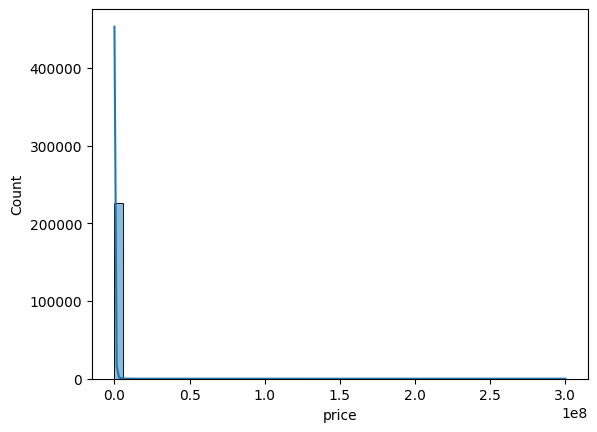

In [93]:
# Data Visualization
sns.histplot(df['price'], bins=50, kde=True)
plt.show()

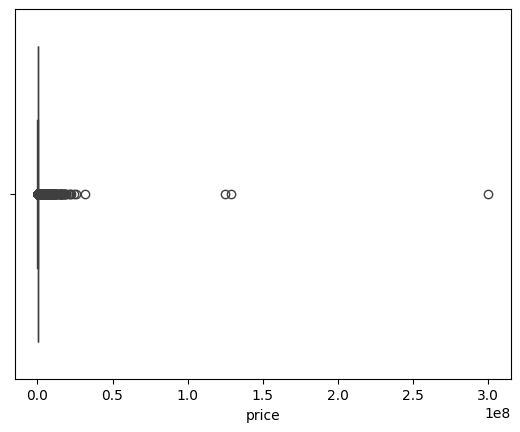

In [94]:
sns.boxplot(x=df['price'])
plt.show()

In [95]:
df.fillna({'price': df['price'].median()}, inplace=True)
df.dropna(subset=['size', 'address'], inplace=True)

In [96]:
df.drop(columns=['student_avaliable', 'mortgage_avaliable'], inplace=True)

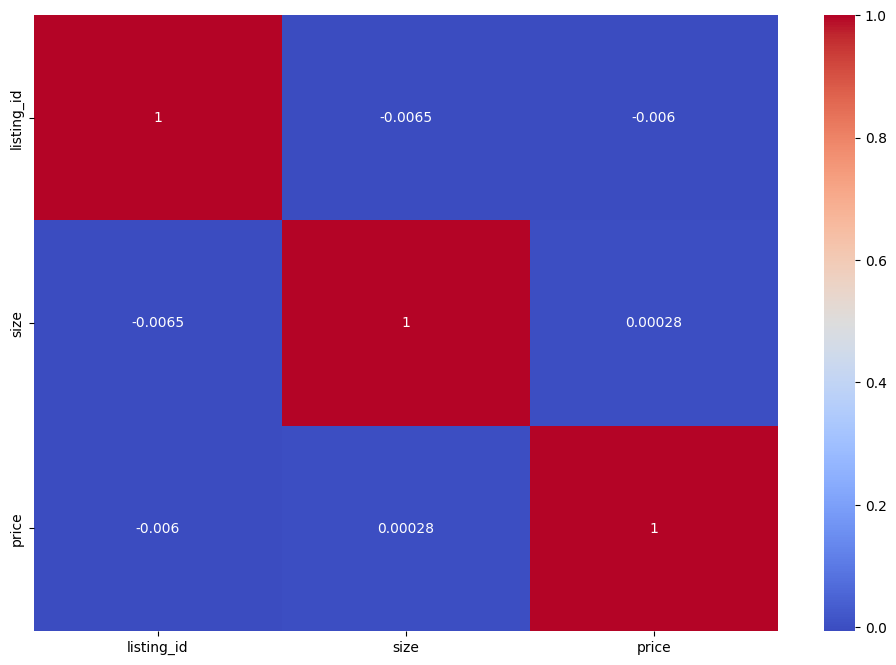

In [97]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()


## 3. Data Cleaning & Preprocessing

In [98]:
df['address'].isnull().sum()

0

In [99]:
df['address'] = df['address'].astype(str)

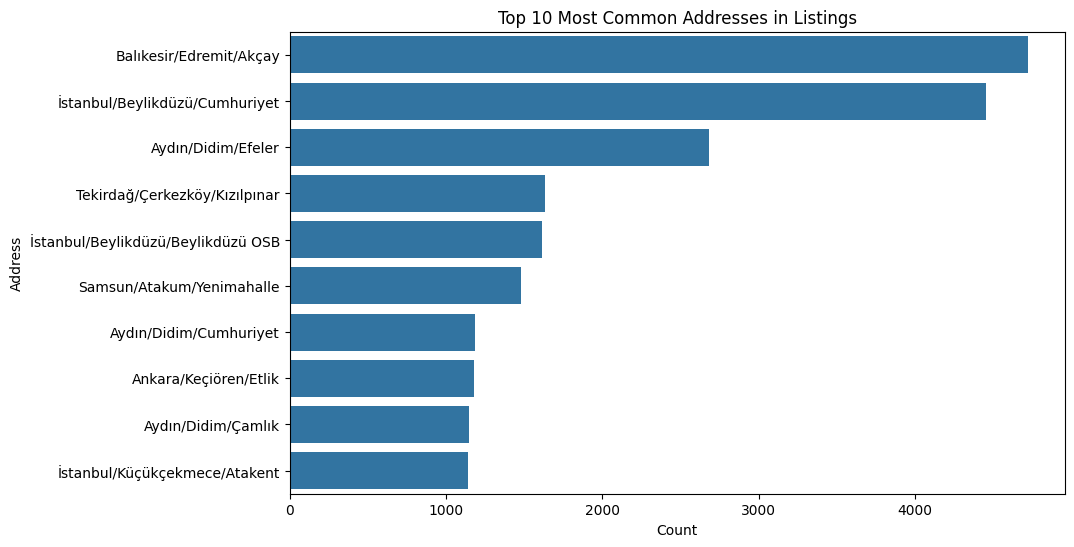

In [100]:
plt.figure(figsize=(10, 6))
top_addresses = df['address'].value_counts().nlargest(10)  # Top 10
sns.barplot(y=top_addresses.index, x=top_addresses.values)
plt.xlabel("Count")
plt.ylabel("Address")
plt.title("Top 10 Most Common Addresses in Listings")
plt.show()

In [101]:
# Convert relevant columns to numeric if necessary
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN


In [102]:
# Fill missing values only for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [103]:
# Handle categorical missing values separately (e.g., filling with mode or "Unknown")
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [104]:
# Outlier Removal using IQR for 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

## 4. Data Transformation & Feature Engineering

In [105]:
# Standardizing text-based columns
df['address'] = df['address'].astype(str).str.strip().str.lower()

In [106]:
# Feature Engineering
df['price_per_sqft'] = df['price'] / df['size']

In [107]:
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

In [108]:
if 'year_built' in df.columns:
    df['year_built'] = pd.to_numeric(df['year_built'], errors='coerce')
    df['age'] = 2025 - df['year_built']
    df['is_new'] = (df['age'] <= 10).astype(int)


In [109]:
# Fill NaN values only if the columns exist
df['price_per_sqft'] = df['price_per_sqft'].fillna(df['price_per_sqft'].median())


if 'age' in df.columns:
    df['age'].fillna(df['age'].median(), inplace=True)

print("Data Cleaning & Feature Engineering completed successfully!")


Data Cleaning & Feature Engineering completed successfully!


In [110]:
# List of categorical columns for one-hot encoding
categorical_columns = ['listing_type', 'building_age', 'furnished', 'heating_type', 'currency']

# Only keep columns that exist in df
existing_columns = [col for col in categorical_columns if col in df.columns]

# Apply one-hot encoding only to existing columns
df2 = pd.get_dummies(df, columns=existing_columns)

In [111]:
df2

,listing_id,type,sub_type,start_date,end_date,total_floor_count,floor_no,room_count,size,address,...,heating_type_Merkezi Sistem,heating_type_Merkezi Sistem (Isı Payı Ölçer),heating_type_Soba (Doğalgaz),heating_type_Soba (Kömür),heating_type_Yerden Isıtma,heating_type_Yok,currency_EUR,currency_GBP,currency_TRY,currency_USD
0,1,Konut,Daire,1/3/19,1/3/19,4,Kot 3,3+1,130.0,kocaeli/körfez/fatih,...,False,False,False,False,False,False,False,False,True,False
1,2,Konut,Daire,1/2/19,1/2/19,5,1,4+1,175.0,ankara/yenimahalle/burç,...,False,False,False,False,False,False,False,False,True,False
2,3,Konut,Daire,1/2/19,1/2/19,3,1,3+1,125.0,antalya/kepez/kütükçü,...,False,False,False,False,False,False,False,False,True,False
3,4,Konut,Daire,1/2/19,1/2/19,10,7,2+1,72.0,i̇stanbul/esenler/kazım karabekir,...,False,False,False,False,False,False,False,False,True,False
4,5,Konut,Daire,1/2/19,1/2/19,4,3,1+1,75.0,i̇stanbul/beylikdüzü/yakuplu,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225732,225733,Konut,Daire,1/8/18,5/4/18,6,5,2+1,120.0,tekirdağ/çerkezköy/yıldırım beyazıt,...,False,False,False,False,False,False,False,False,True,False
225733,225734,Konut,Daire,1/8/18,2/12/18,5,Yüksek Giriş,3+1,120.0,manisa/yunusemre/kuyualan,...,False,False,False,False,False,False,False,False,True,False
225734,225735,Konut,Daire,1/8/18,1/18/18,4,Giriş Katı,1+1,60.0,mersin/erdemli/alata,...,False,False,False,False,False,False,False,False,True,False
225735,225736,Konut,Daire,1/8/18,12/15/18,6,5,6+2,250.0,i̇stanbul/esenyurt/atatürk,...,False,False,False,False,False,False,False,False,True,False


In [120]:
df2.to_csv('listing_data_publish_cleaned.csv', index=False)

## 5. Exploratory Data Analysis (EDA)

In [114]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")


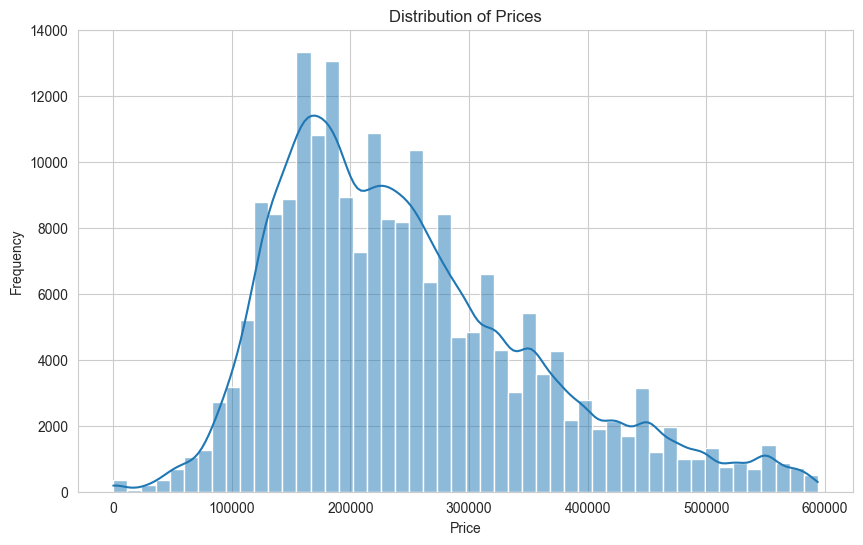

In [115]:
# Plot the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df2['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

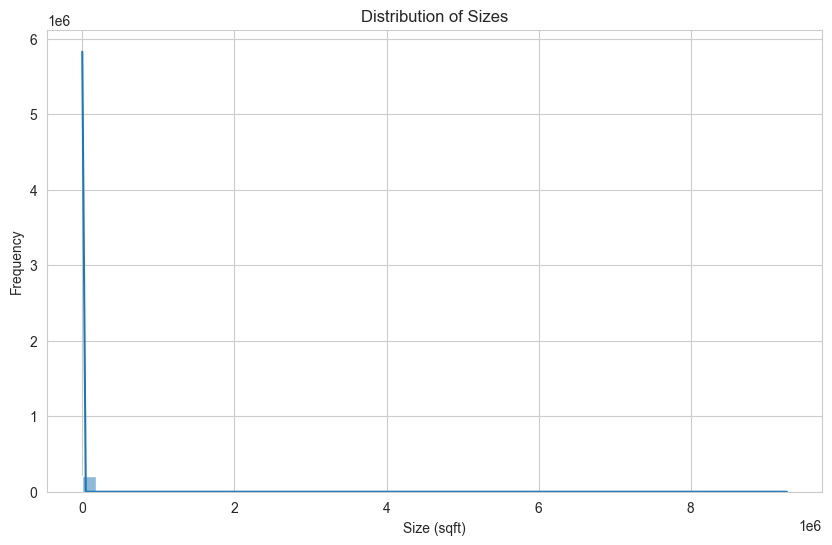

In [116]:
# Plot the distribution of sizes
plt.figure(figsize=(10, 6))
sns.histplot(df2['size'], bins=50, kde=True)
plt.title('Distribution of Sizes')
plt.xlabel('Size (sqft)')
plt.ylabel('Frequency')
plt.show()

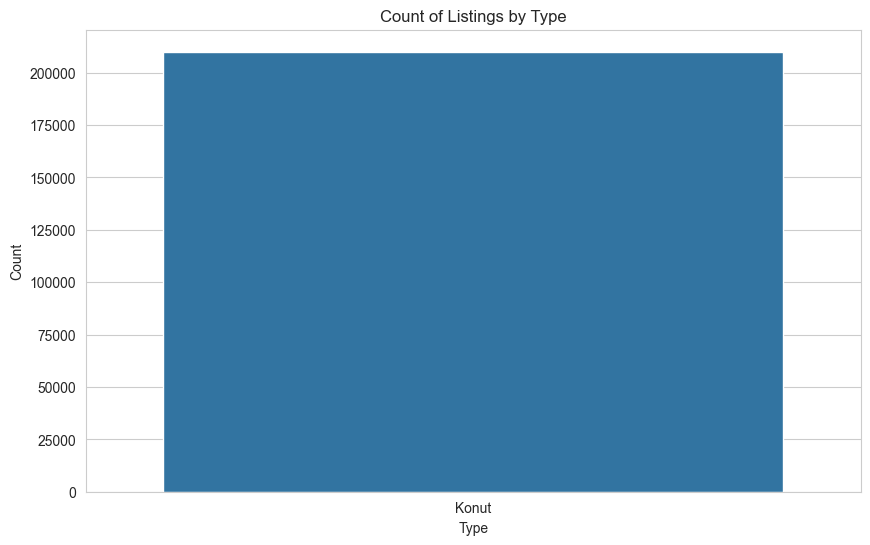

In [117]:
# Plot the count of listings by type
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='type')
plt.title('Count of Listings by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

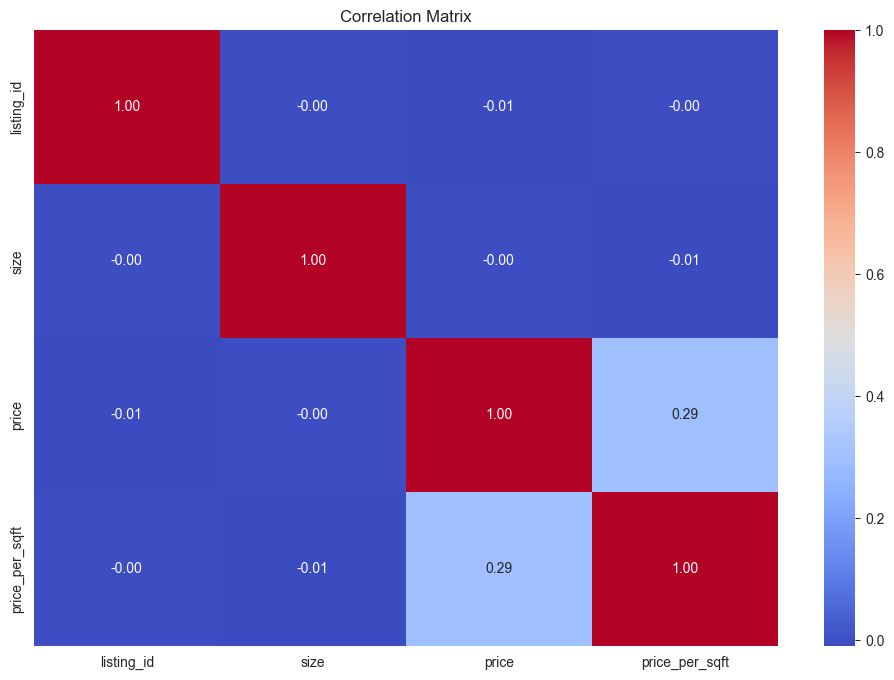

In [118]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df2.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

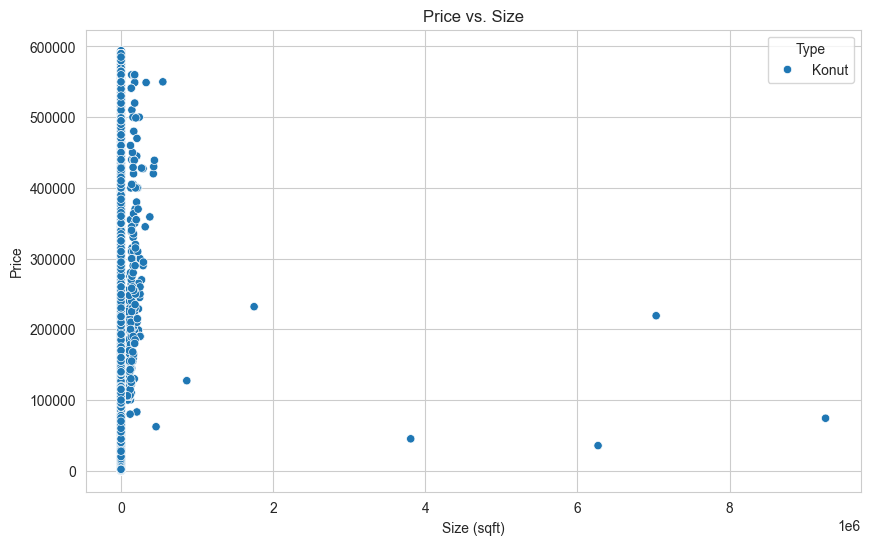

In [119]:
# Scatter plot of price vs. size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='size', y='price', hue='type')
plt.title('Price vs. Size')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.legend(title='Type')
plt.show()